In [210]:
# import relevant libraries
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt

In [211]:
# import the data scrapped from youtube into a dataframe
video_df = pd.read_csv("data/videos_unfiltered.csv", parse_dates=["published_at"])
video_df.head()

,video_id,title,description,published_at,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,comment_count,channel_id
0,JZ5f2BiA2go,Are Low Fat Vegans Wrong?,Stack this discount code on top of Hume’s curr...,2025-05-16 20:56:00+00:00,Mic the Vegan,28,"['HumeHealth', 'SmartScale', 'Weightloss', 'Ve...",PT15M33S,hd,False,25587,1808,734,UCGJq0eQZoFSwgcqgxIE9MHw
1,CHXpmOPD9Os,Vegan Milk: India Is Ready For Veganism? With ...,Vegan milk: is India ready for veganism? The r...,2021-06-07 06:36:53+00:00,David Ramms,24,"['vegan milk india', 'vegan milk', 'vegan milk...",PT1H29M38S,hd,False,2985,328,123,UCBhciyIVI2SzjXjIEPN4txg
2,Va2CekNsF9c,What is the greatest benefit of being vegan? #...,Sharing the number one benefit of being vegan ...,2023-04-16 03:13:54+00:00,HazVegan,24,"['outreach', 'cube', 'of', 'truth', 'anonymous...",PT30S,hd,False,4369,58,29,UCplPgkdifNuv0mrtWCqTV9w
3,liLxjPsbgig,"""You're DELUDED!"" Vegan & Farmer CLASH in LIVE...",Things get heated on GB news when Joey Carbstr...,2023-10-13 16:16:50+00:00,Joey Carbstrong,29,[],PT12M29S,hd,False,19852,1877,1029,UCG6usHVNuRbexyisxE27nDw
4,JMOZpfd7JfE,BLM Activists Discuss Speciesism | Edmonton Ve...,Two BLM Activists were intrigued by the cube o...,2020-08-09 20:03:10+00:00,Edmonton Vegan Outreach,29,"['Cube of Truth', 'Anonymous for the Voiceless...",PT4M50S,hd,False,458,62,8,UCsU5QtzfvVX2DFcmIYM3aRg


In [212]:
video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   video_id       975 non-null    object             
 1   title          975 non-null    object             
 2   description    877 non-null    object             
 3   published_at   975 non-null    datetime64[ns, UTC]
 4   channel_title  975 non-null    object             
 5   category_id    975 non-null    int64              
 6   tags           975 non-null    object             
 7   duration       975 non-null    object             
 8   definition     975 non-null    object             
 9   caption        975 non-null    bool               
 10  view_count     975 non-null    int64              
 11  like_count     975 non-null    int64              
 12  comment_count  975 non-null    int64              
 13  channel_id     975 non-null    object             

In [213]:
# Add hour, weekday and month columns
video_df["hour_published"] = video_df["published_at"].dt.hour
video_df["weekday_published"] = video_df["published_at"].dt.weekday
video_df["month_published"] = video_df["published_at"].dt.month
video_df.drop(columns="published_at", inplace=True)
video_df.head()


,video_id,title,description,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,comment_count,channel_id,hour_published,weekday_published,month_published
0,JZ5f2BiA2go,Are Low Fat Vegans Wrong?,Stack this discount code on top of Hume’s curr...,Mic the Vegan,28,"['HumeHealth', 'SmartScale', 'Weightloss', 'Ve...",PT15M33S,hd,False,25587,1808,734,UCGJq0eQZoFSwgcqgxIE9MHw,20,4,5
1,CHXpmOPD9Os,Vegan Milk: India Is Ready For Veganism? With ...,Vegan milk: is India ready for veganism? The r...,David Ramms,24,"['vegan milk india', 'vegan milk', 'vegan milk...",PT1H29M38S,hd,False,2985,328,123,UCBhciyIVI2SzjXjIEPN4txg,6,0,6
2,Va2CekNsF9c,What is the greatest benefit of being vegan? #...,Sharing the number one benefit of being vegan ...,HazVegan,24,"['outreach', 'cube', 'of', 'truth', 'anonymous...",PT30S,hd,False,4369,58,29,UCplPgkdifNuv0mrtWCqTV9w,3,6,4
3,liLxjPsbgig,"""You're DELUDED!"" Vegan & Farmer CLASH in LIVE...",Things get heated on GB news when Joey Carbstr...,Joey Carbstrong,29,[],PT12M29S,hd,False,19852,1877,1029,UCG6usHVNuRbexyisxE27nDw,16,4,10
4,JMOZpfd7JfE,BLM Activists Discuss Speciesism | Edmonton Ve...,Two BLM Activists were intrigued by the cube o...,Edmonton Vegan Outreach,29,"['Cube of Truth', 'Anonymous for the Voiceless...",PT4M50S,hd,False,458,62,8,UCsU5QtzfvVX2DFcmIYM3aRg,20,6,8


In [214]:
# import the category & channel data and merge it to the video dataframe
categories = pd.read_csv("data/categories.csv")
channels = pd.read_csv("data/channels.csv")
video_df = video_df.merge(categories, on="category_id").merge(channels, on="channel_id").drop(columns=["category_id", "channel_id"])
video_df.head()

,video_id,title,description,channel_title,tags,duration,definition,caption,view_count,like_count,comment_count,hour_published,weekday_published,month_published,category,channel_view_count,channel_sub_count,channel_video_count
0,JZ5f2BiA2go,Are Low Fat Vegans Wrong?,Stack this discount code on top of Hume’s curr...,Mic the Vegan,"['HumeHealth', 'SmartScale', 'Weightloss', 'Ve...",PT15M33S,hd,False,25587,1808,734,20,4,5,Science & Technology,57588595,404000,648
1,CHXpmOPD9Os,Vegan Milk: India Is Ready For Veganism? With ...,Vegan milk: is India ready for veganism? The r...,David Ramms,"['vegan milk india', 'vegan milk', 'vegan milk...",PT1H29M38S,hd,False,2985,328,123,6,0,6,Entertainment,20821721,48100,685
2,Va2CekNsF9c,What is the greatest benefit of being vegan? #...,Sharing the number one benefit of being vegan ...,HazVegan,"['outreach', 'cube', 'of', 'truth', 'anonymous...",PT30S,hd,False,4369,58,29,3,6,4,Entertainment,57145,517,145
3,liLxjPsbgig,"""You're DELUDED!"" Vegan & Farmer CLASH in LIVE...",Things get heated on GB news when Joey Carbstr...,Joey Carbstrong,[],PT12M29S,hd,False,19852,1877,1029,16,4,10,Nonprofits & Activism,44357346,172000,1334
4,JMOZpfd7JfE,BLM Activists Discuss Speciesism | Edmonton Ve...,Two BLM Activists were intrigued by the cube o...,Edmonton Vegan Outreach,"['Cube of Truth', 'Anonymous for the Voiceless...",PT4M50S,hd,False,458,62,8,20,6,8,Nonprofits & Activism,53659,884,129


In [215]:
# convert duration into total seconds
hours = video_df["duration"].str.extract(r"PT(\d+)H")[0].fillna(0).astype(int)
minutes = video_df["duration"].str.extract(r"(\d+)M")[0].fillna(0).astype(int)
seconds = video_df["duration"].str.extract(r"(\d+)S")[0].fillna(0).astype(int)
duration = pd.to_timedelta(hours, unit="hours") + pd.to_timedelta(minutes, unit="minutes") + pd.to_timedelta(seconds, unit="seconds")
video_df["duration_seconds"] = duration.dt.total_seconds().astype(int)
video_df.drop(columns="duration", inplace=True)
video_df.head()


,video_id,title,description,channel_title,tags,definition,caption,view_count,like_count,comment_count,hour_published,weekday_published,month_published,category,channel_view_count,channel_sub_count,channel_video_count,duration_seconds
0,JZ5f2BiA2go,Are Low Fat Vegans Wrong?,Stack this discount code on top of Hume’s curr...,Mic the Vegan,"['HumeHealth', 'SmartScale', 'Weightloss', 'Ve...",hd,False,25587,1808,734,20,4,5,Science & Technology,57588595,404000,648,933
1,CHXpmOPD9Os,Vegan Milk: India Is Ready For Veganism? With ...,Vegan milk: is India ready for veganism? The r...,David Ramms,"['vegan milk india', 'vegan milk', 'vegan milk...",hd,False,2985,328,123,6,0,6,Entertainment,20821721,48100,685,5378
2,Va2CekNsF9c,What is the greatest benefit of being vegan? #...,Sharing the number one benefit of being vegan ...,HazVegan,"['outreach', 'cube', 'of', 'truth', 'anonymous...",hd,False,4369,58,29,3,6,4,Entertainment,57145,517,145,30
3,liLxjPsbgig,"""You're DELUDED!"" Vegan & Farmer CLASH in LIVE...",Things get heated on GB news when Joey Carbstr...,Joey Carbstrong,[],hd,False,19852,1877,1029,16,4,10,Nonprofits & Activism,44357346,172000,1334,749
4,JMOZpfd7JfE,BLM Activists Discuss Speciesism | Edmonton Ve...,Two BLM Activists were intrigued by the cube o...,Edmonton Vegan Outreach,"['Cube of Truth', 'Anonymous for the Voiceless...",hd,False,458,62,8,20,6,8,Nonprofits & Activism,53659,884,129,290


In [216]:
# split up tags to get a value count
video_df["tags"] = video_df["tags"].apply(lambda x: ast.literal_eval(x))
all_tags = video_df["tags"].explode().str.lower()
tag_counts = all_tags.value_counts()
tag_counts

tags
vegan                     395
veganism                  236
animal rights             146
earthling ed              101
activism                   86
                         ... 
forensic psychology         1
daily mail lucy letby       1
tristan tate christian      1
andrew tate religion        1
lucy letby charged          1
Name: count, Length: 5457, dtype: int64

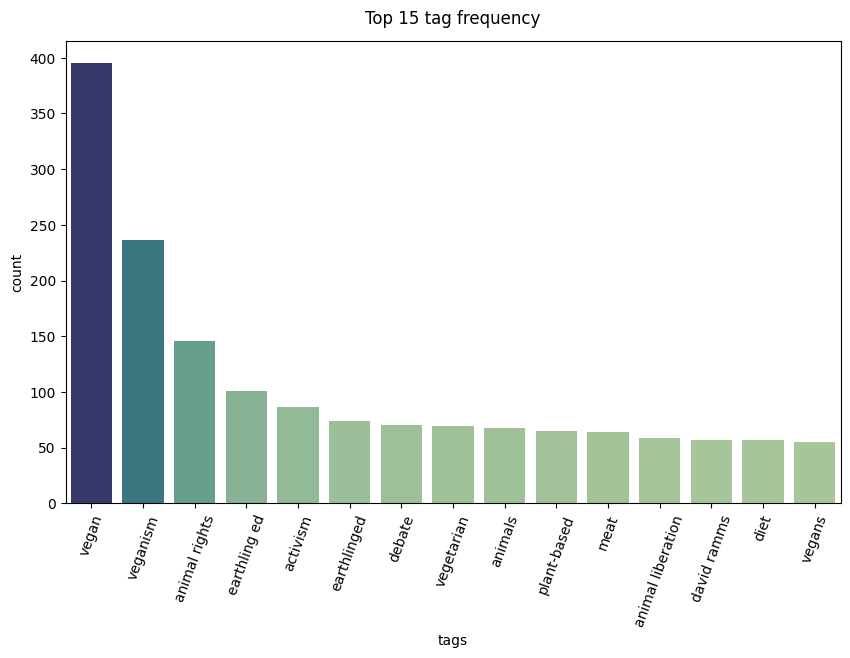

In [244]:
# visualize tag frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=tag_counts.index[:15], y=tag_counts.values[:15], palette="crest", hue=tag_counts[:15], legend=False)
plt.title("Top 15 tag frequency", y=1.02)
plt.ylabel("count")
plt.xticks(rotation=70);

In [233]:
tag_counts.head(15)

tags
vegan                395
veganism             236
animal rights        146
earthling ed         101
activism              86
earthlinged           74
debate                70
vegetarian            69
animals               68
plant-based           65
meat                  64
animal liberation     59
david ramms           57
diet                  57
vegans                55
Name: count, dtype: int64